In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
iris_df=sns.load_dataset('iris')

In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
setosa=iris_df[iris_df['species']=='setosa']
versicolor=iris_df[iris_df['species']=='versicolor']
virginica=iris_df[iris_df['species']=='virginica']

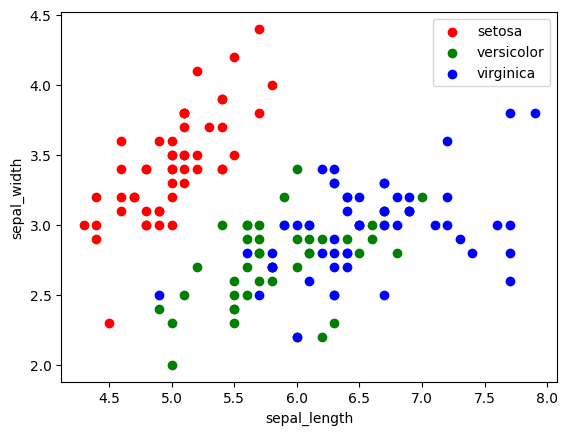

In [ ]:
fig=plt.scatter(setosa['sepal_length'],setosa['sepal_width'],color='red',label='setosa')
fig=plt.scatter(versicolor['sepal_length'],versicolor['sepal_width'],color='green',label='versicolor')
fig=plt.scatter(virginica['sepal_length'],virginica['sepal_width'],color='blue',label='virginica')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

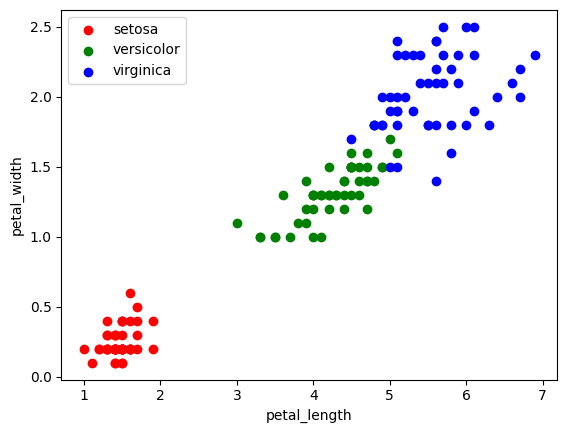

In [ ]:
fig=plt.scatter(setosa['petal_length'],setosa['petal_width'],color='red',label='setosa')
fig=plt.scatter(versicolor['petal_length'],versicolor['petal_width'],color='green',label='versicolor')
fig=plt.scatter(virginica['petal_length'],virginica['petal_width'],color='blue',label='virginica')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.



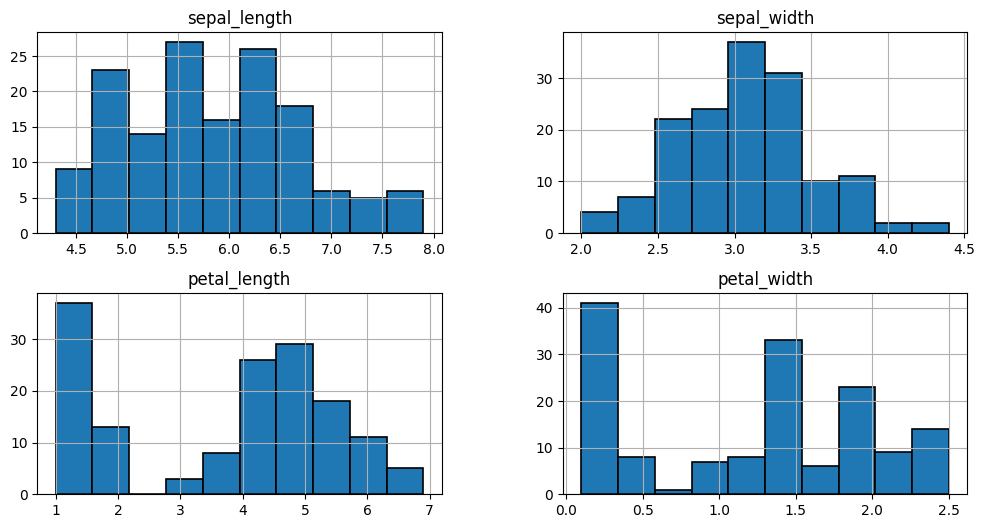

In [ ]:
iris_df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

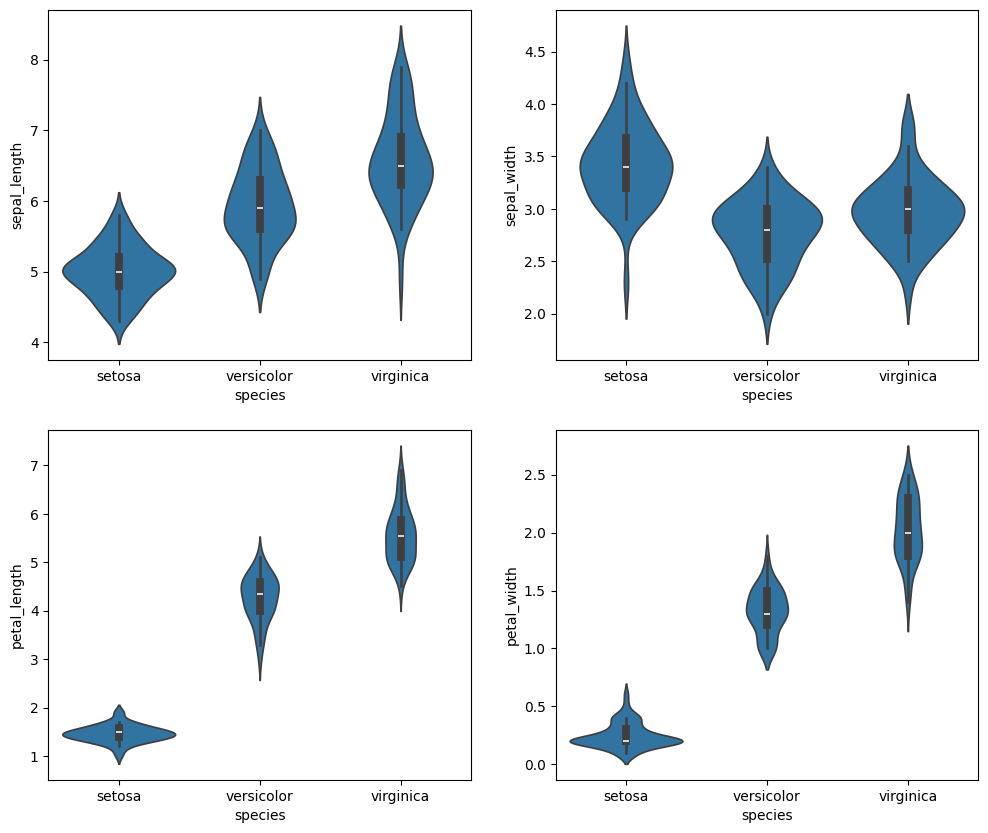

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.violinplot(x='species', y='sepal_length', data=iris_df, ax=axes[0, 0])
sns.violinplot(x='species', y='sepal_width', data=iris_df, ax=axes[0, 1])
sns.violinplot(x='species', y='petal_length', data=iris_df, ax=axes[1, 0])
sns.violinplot(x='species', y='petal_width', data=iris_df, ax=axes[1, 1])

plt.show()

#Model Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

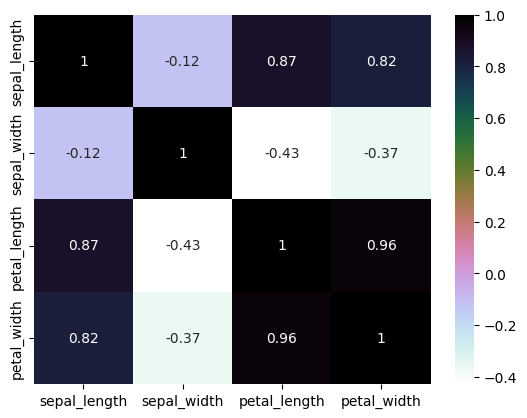

In [ ]:
corr_matrix=iris_df.drop('species', axis=1).corr()
sns.heatmap(corr_matrix,annot=True,cmap='cubehelix_r')
plt.show()

In [ ]:
train, test = train_test_split(iris_df, test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


Lets train with all the data at first and check the accuracy

In [ ]:
train_X=train[['sepal_length','sepal_width','petal_length','petal_width']]
train_y=train.species
test_X=test[['sepal_length','sepal_width','petal_length','petal_width']]
test_y =test.species

In [ ]:
train_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
112,6.8,3.0,5.5,2.1
103,6.3,2.9,5.6,1.8


In [ ]:
test_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
50,7.0,3.2,4.7,1.4


In [ ]:
train_y.head()

,species
112,virginica
103,virginica
0,setosa
130,virginica
20,setosa


###Model for All features

In [ ]:
#SVM
model=svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9333333333333333


SVM is giving a very good accuracy lets check other models

In [ ]:
#logistic Regression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


Logistic Regression gave more accuracy then SVM

In [ ]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


Decision Tree and SVM both are giving same accuracy

In [ ]:
#K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3) #Takes three neighbors to examine new data
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


KNN and Logistics regression both are giving the same accuracy

Lets check the accuracy for various values of KNN

([<matplotlib.axis.XTick at 0x7dae09793c50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

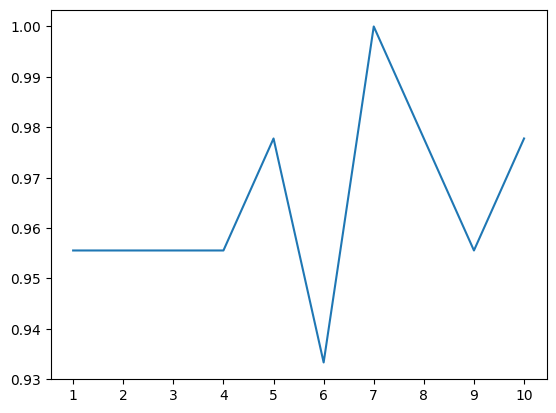

In [ ]:
a_index=list(range(1,11))
a=[]
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) #check from one to ten
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

plt.plot(a_index, a)
plt.xticks(x)

You can see the graph with different value of N

###We used all the features to build model now lets use separate features and check them

Creating Petals And Sepals Training Data

In [ ]:
petal=iris_df[['petal_length','petal_width','species']]
sepal=iris_df[['sepal_length','sepal_width','species']]

In [ ]:
#Petal
train_p, test_p=train_test_split(petal,test_size=0.3)
train_x_p=train_p[['petal_length','petal_width']]
train_y_p=train_p.species
test_x_p=test_p[['petal_length','petal_width']]
test_y_p=test_p.species


#Sepal
train_s, test_s=train_test_split(sepal,test_size=0.3)
train_x_s=train_s[['sepal_length','sepal_width']]
train_y_s=train_s.species
test_x_s=train_s[['sepal_length','sepal_width']]
test_y_s=train_s.species

In [ ]:
#SVM

#Petal
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#Sepal
model=svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9555555555555556
The accuracy of the SVM using Petals is: 0.8571428571428571


In [ ]:
#Logistic Regression

#Petal
model=LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#Sepal
model=LogisticRegression()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9555555555555556
The accuracy of the Logistic Regression using Petals is: 0.8476190476190476


In [ ]:
#Decision Tree

#Petal
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))


#Sepal
model=DecisionTreeClassifier()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Petals is: 0.9142857142857143


In [ ]:
#K-Nearest Neighbours

#Petal
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the K-Nearest Neighbours using Petals is:',metrics.accuracy_score(prediction,test_y_p))


#Sepal
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the K-Nearest Neighbours using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the K-Nearest Neighbours using Petals is: 0.9555555555555556
The accuracy of the K-Nearest Neighbours using Sepal is: 0.8571428571428571


###Nothing Changed much according to the accuracy we could achieve